In [11]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset for men's and women's perfumes
mens_perfume_df = pd.read_csv("/content/ebay_mens_perfume.csv")
womens_perfume_df = pd.read_csv("/content/ebay_womens_perfume.csv")

# Display basic information about the datasets
print("Men's Perfume Dataset Info:")
print(mens_perfume_df.info())

print("\nWomen's Perfume Dataset Info:")
print(womens_perfume_df.info())

Men's Perfume Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB
None

Women's Perfume Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  

In [4]:
# Check for missing values
print("Missing Values in Men's Perfume Dataset:")
print(mens_perfume_df.isnull().sum())

print("\nMissing Values in Women's Perfume Dataset:")
print(womens_perfume_df.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Men's Perfume Dataset:")
print(mens_perfume_df.describe())

print("\nSummary Statistics for Women's Perfume Dataset:")
print(womens_perfume_df.describe())

Missing Values in Men's Perfume Dataset:
brand                  1
title                  0
type                   3
price                  0
priceWithCurrency      0
available            111
availableText          3
sold                   6
lastUpdated           53
itemLocation           0
dtype: int64

Missing Values in Women's Perfume Dataset:
brand                  1
title                  0
type                   2
price                  0
priceWithCurrency      0
available            131
availableText          8
sold                  16
lastUpdated           73
itemLocation           0
dtype: int64

Summary Statistics for Men's Perfume Dataset:
             price   available          sold
count  1000.000000  889.000000    994.000000
mean     46.481200   20.046119    766.266600
std      35.527862   61.547985   3200.971733
min       3.000000    2.000000      1.000000
25%      22.990000    5.000000     14.000000
50%      35.710000   10.000000     49.500000
75%      59.000000   10.000

In [5]:
# Market Analysis: Average price of perfumes by brand and type
avg_price_by_brand_men = mens_perfume_df.groupby('brand')['price'].mean()
avg_price_by_brand_women = womens_perfume_df.groupby('brand')['price'].mean()

avg_price_by_type_men = mens_perfume_df.groupby('type')['price'].mean()
avg_price_by_type_women = womens_perfume_df.groupby('type')['price'].mean()

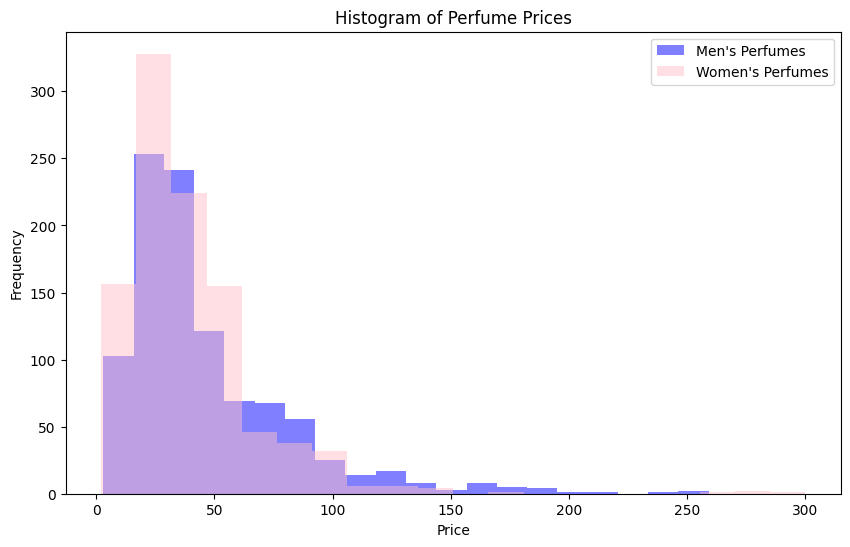

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(mens_perfume_df['price'], bins=20, alpha=0.5, label='Men\'s Perfumes', color='blue')
plt.hist(womens_perfume_df['price'], bins=20, alpha=0.5, label='Women\'s Perfumes', color='pink')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Perfume Prices')
plt.legend()
plt.show()

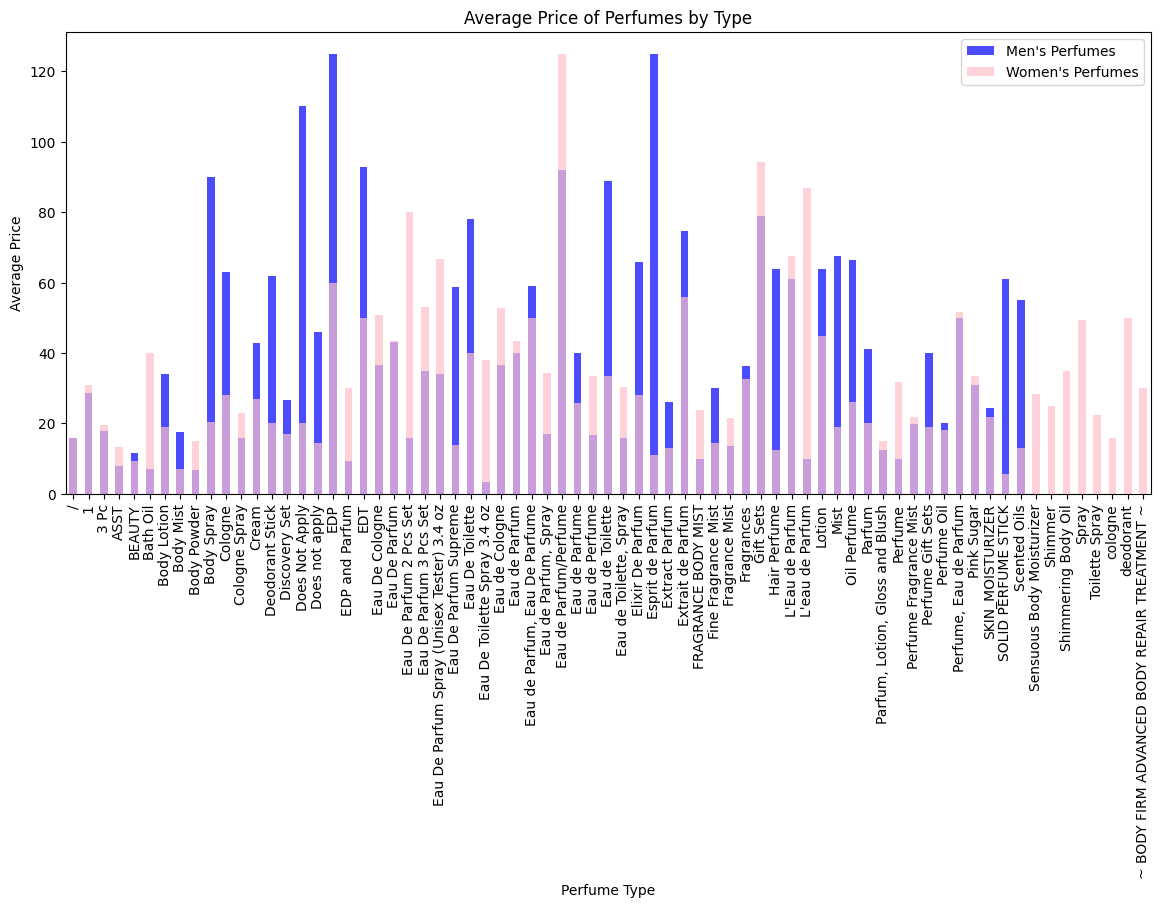

In [7]:
avg_price_by_type_men.plot(kind='bar', color='blue', alpha=0.7, label='Men\'s Perfumes', figsize=(14, 6))
avg_price_by_type_women.plot(kind='bar', color='pink', alpha=0.7, label='Women\'s Perfumes')

plt.xlabel('Perfume Type')
plt.ylabel('Average Price')
plt.title('Average Price of Perfumes by Type')
plt.legend()
plt.show()

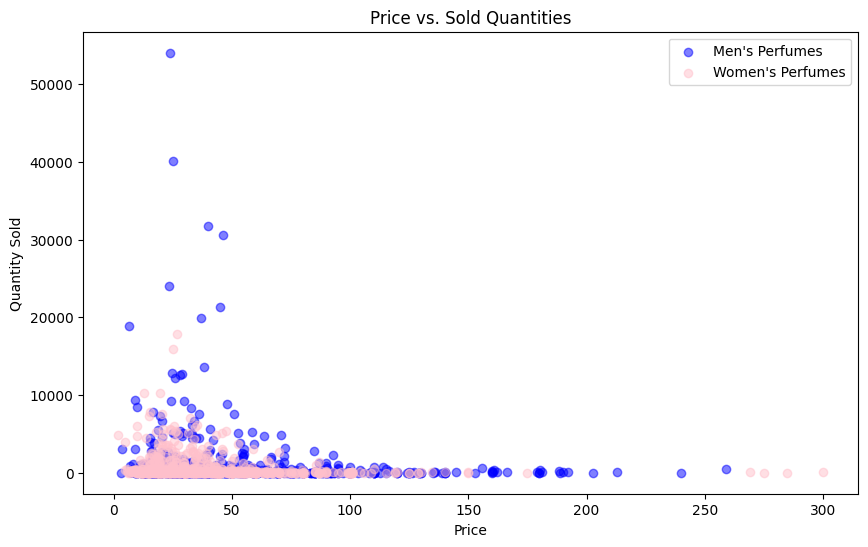

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(mens_perfume_df['price'], mens_perfume_df['sold'], label='Men\'s Perfumes', color='blue', alpha=0.5)
plt.scatter(womens_perfume_df['price'], womens_perfume_df['sold'], label='Women\'s Perfumes', color='pink', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.title('Price vs. Sold Quantities')
plt.legend()
plt.show()

<ipython-input-13-3e43c687e40a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


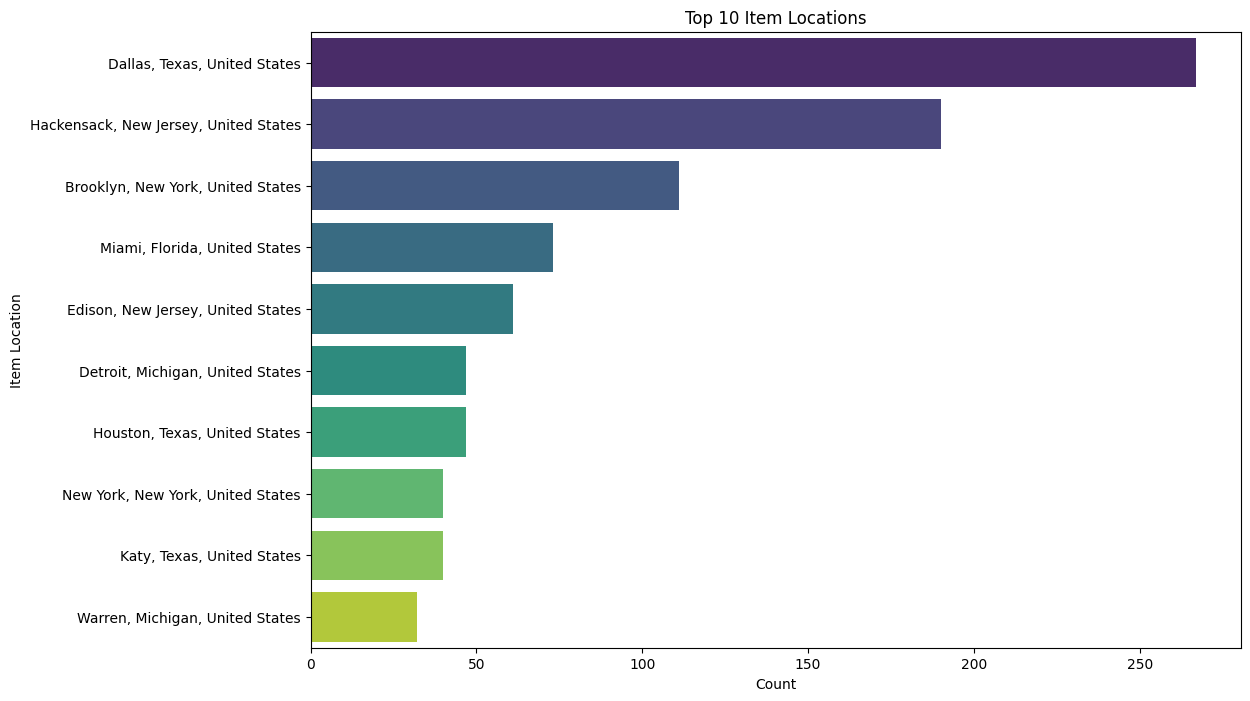

In [13]:
combined_df = pd.concat([mens_perfume_df, womens_perfume_df])

# Reset the index of the combined DataFrame to avoid duplicate indices
combined_df = combined_df.reset_index(drop=True) # This line is added

# Get the top 10 locations from the combined DataFrame
top_10_locations = combined_df['itemLocation'].value_counts().index[:10]

plt.figure(figsize=(12, 8))

# Use the top 10 locations for the order in countplot
sns.countplot(
    y='itemLocation',
    data=combined_df,
    order=top_10_locations,
    palette='viridis'
)

plt.title('Top 10 Item Locations')
plt.xlabel('Count')
plt.ylabel('Item Location')
plt.show()